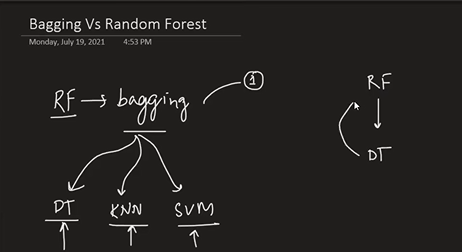

1) Random Forests uses only decision trees as base models in it whereas bagging can use any base model for it

If we create a bagging ensemble full of decision trees can it be considered a random forest?

A) No

### 🌲 Is a Bagging Ensemble of Decision Trees a Random Forest?

**Short Answer:**  
**Not necessarily.** While Random Forests use bagging with decision trees, they add an extra layer of randomness that sets them apart.

---

### 🧩 Key Differences

| Feature                         | Bagging Ensemble (of Trees)      | Random Forest                   |
|---------------------------------|----------------------------------|---------------------------------|
| Base Estimator                  | Usually Decision Trees           | Decision Trees                  |
| Sampling                        | ✅ With Replacement              | ✅ With Replacement             |
| Feature Subsampling             | ❌ No                            | ✅ Yes (random subset of features at each split) |
| Tree Diversity                  | Moderate                         | **High** (due to feature randomness) |
| Overfitting Risk                | Higher                           | Lower                           |
| Default Implementation in Sklearn | `BaggingClassifier` with `DecisionTreeClassifier` | `RandomForestClassifier`        |

---

### 🧠 Why Random Forest ≠ Plain Bagging

Random Forest =  
> Bagging of decision trees + **random feature selection at each split**

This **random feature subset** is what increases diversity among trees, leading to better generalization and reduced variance.

---

### ✅ Conclusion

> A **bagging ensemble of decision trees** is **not** strictly a **Random Forest**, unless it also includes **random feature selection at each split**.


### 🔍 Exact Difference Between Decision Trees and Random Forests

Both **Decision Trees** and **Random Forests** use the same splitting criteria (like **Gini Impurity** or **Entropy**).  
The **key difference lies in how features and data are sampled** — not in the splitting logic itself.

---

### 🧩 Breakdown of Differences

| Step | **Decision Tree** | **Random Forest** |
|------|--------------------|-------------------|
| **Data Sampling** | Uses **entire training set** | Each tree gets a **bootstrap sample** (sample with replacement) |
| **Feature Selection at Split** | Considers **all features** at every split | Considers a **random subset of features** at each split |
| **Split Criterion** | Gini / Entropy | Gini / Entropy (same as DT) |
| **Overfitting Tendency** | High (single tree memorizes data) | Lower (averaging multiple trees reduces variance) |

---

### 🎯 Where Exactly Is the Difference?

1. **Data Sampling (Bagging):**
   - Random Forest grows each tree on a **different subset of data**, generated via **sampling with replacement**.

2. **Feature Subsampling (Random Feature Selection):**
   - At each **split in a tree**, instead of checking **all features** to find the best one, Random Forest:
     - **Randomly selects a subset of features**
     - Then picks the best feature from **that subset** using Gini or Entropy

---

### 🧠 Why This Matters

- **More randomness** = **more diversity** among trees
- When averaged, diverse trees:
  - **Reduce variance**
  - Improve generalization
- This makes **Random Forests more robust** than a single decision tree.

---

### ✅ Summary

> 🟢 Both use Gini/Entropy to split.  
> 🔴 But **Random Forests randomly limit the feature choices** at each split and use **bootstrap samples**, making them more powerful and less prone to overfitting.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.544947,3.952185,1.050162,2.109388,-0.966711,1
1,-2.203988,2.674164,1.104434,1.305521,-0.346010,1
2,-0.622543,2.087338,1.542808,4.172927,1.188759,0
3,-0.962438,0.986245,0.320340,-0.067014,-0.497887,0
4,-0.441496,-0.877642,-0.204299,-1.325941,-0.304994,1


In [5]:
bag = BaggingClassifier(max_features=2, n_jobs=-1)

In [6]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2, n_jobs=-1)

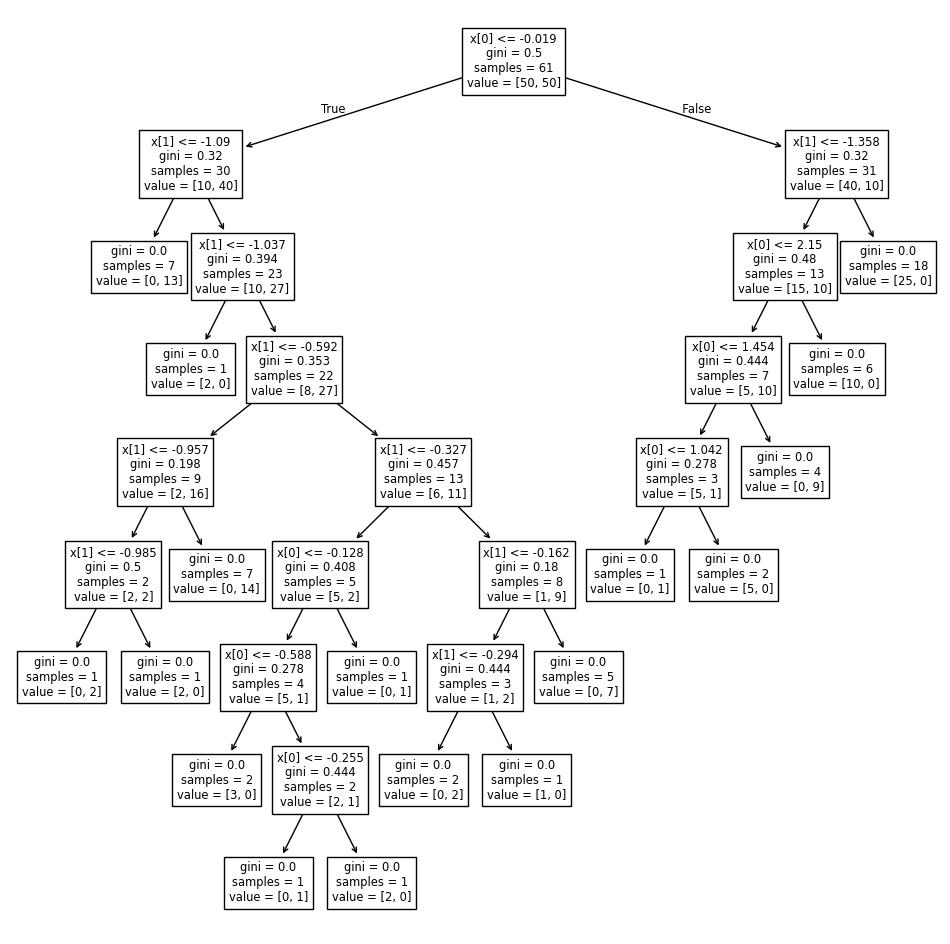

In [7]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [9]:
rf = RandomForestClassifier(max_features=2, n_jobs=-1)

In [10]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2, n_jobs=-1)

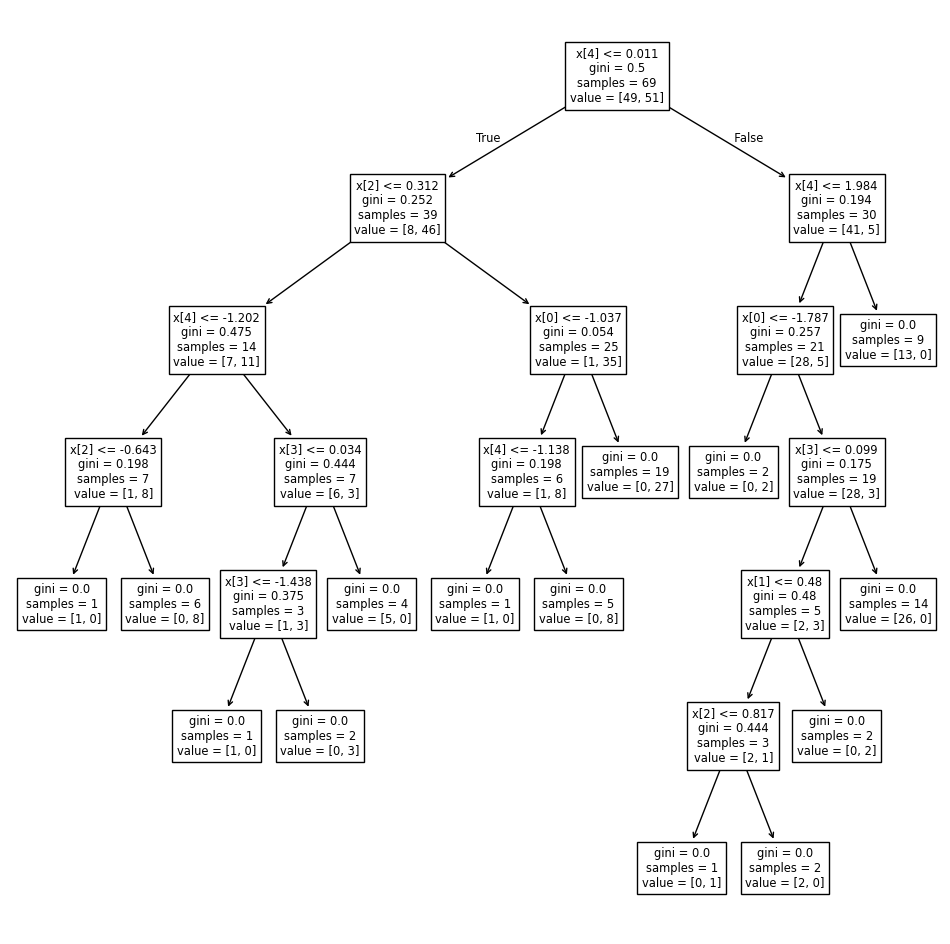

In [11]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

**So basically, the biggest difference between the two is that in a bagging classifier full of decision trees, we consider all features before splitting but in a random forest, we split on a subset of the features at each split**

For example, a bagging classifier decision trees will consider all features [1:6] before splitting but in random forests it might consider just 1,5,6 features